<a href="https://colab.research.google.com/github/filippobryantoro/EDA_DV/blob/main/Filippo_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Define what you want to explore. Do you have a research question or a theory? Identify the 'business problem' you're addressing.

What we want to explore:

Differences in internet access between gender/age/education.

Differences in digital payment usage between gender/age/education.

Research Question:



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

from scipy.stats import zscore



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment_1/micro_world_139countries.csv', encoding='latin-1')
df.head()

economy economycode    regionwb   pop_adult  wpid_random       wgt  \
0  Afghanistan         AFG  South Asia  22647496.0    144274031  0.716416   
1  Afghanistan         AFG  South Asia  22647496.0    180724554  0.497408   
2  Afghanistan         AFG  South Asia  22647496.0    130686682  0.650431   
3  Afghanistan         AFG  South Asia  22647496.0    142646649  0.991862   
4  Afghanistan         AFG  South Asia  22647496.0    199055310  0.554940   

   female   age  educ  inc_q  ...  receive_transfers  receive_pension  \
0       2  43.0     2      4  ...                  4                4   
1       2  55.0     1      3  ...                  4                4   
2       1  15.0     1      2  ...                  4                4   
3       2  23.0     1      4  ...                  4                4   
4       1  46.0     1      1  ...                  4                4   

   receive_agriculture  pay_utilities  remittances  mobileowner  \
0                  4.0              1          5.0            1   
1                  2.0              4          5.0            1   
2                  4.0              4          3.0            2   
3                  2.0              4          5.0            1   
4                  4.0              4          5.0            2   

   internetaccess  anydigpayment  merchantpay_dig  year  
0               2              1              0.0  2021  
1               2              0              0.0  2021  
2               2              0              0.0  2021  
3               2              0              0.0  2021  
4               2              0              0.0  2021  

[5 rows x 128 columns]

In [ ]:
df.shape


(143887, 128)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [ ]:
df.index

RangeIndex(start=0, stop=143887, step=1)

In [ ]:
df.describe(include=[np.number]) #Displaying all the rows containing numbers

pop_adult   wpid_random            wgt         female  \
count  1.438870e+05  1.438870e+05  143887.000000  143887.000000   
mean   7.412421e+07  1.611899e+08       1.000000       1.467742   
std    2.253154e+08  2.886117e+07       0.807425       0.498960   
min    2.952496e+05  1.111118e+08       0.131675       1.000000   
25%    4.609787e+06  1.361950e+08       0.437501       1.000000   
50%    9.612429e+06  1.613316e+08       0.756633       1.000000   
75%    3.371732e+07  1.861962e+08       1.283792       2.000000   
max    1.153773e+09  2.111102e+08       6.245670       2.000000   

                 age           educ          inc_q         emp_in  \
count  143420.000000  143887.000000  143887.000000  140385.000000   
mean       41.056889       1.968204       3.234239       1.339965   
std        17.342777       0.723923       1.419803       0.473699   
min        15.000000       1.000000       1.000000       1.000000   
25%        27.000000       1.000000       2.000000       1.000000   
50%        38.000000       2.000000       3.000000       1.000000   
75%        54.000000       2.000000       5.000000       2.000000   
max        99.000000       5.000000       5.000000       2.000000   

       urbanicity_f2f        account  ...  receive_transfers  receive_pension  \
count    75644.000000  143887.000000  ...      143887.000000    143887.000000   
mean         1.579861       0.708646  ...           3.508156         3.687171   
std          0.493584       0.454388  ...           1.074664         0.894404   
min          1.000000       0.000000  ...           1.000000         1.000000   
25%          1.000000       0.000000  ...           4.000000         4.000000   
50%          2.000000       1.000000  ...           4.000000         4.000000   
75%          2.000000       1.000000  ...           4.000000         4.000000   
max          2.000000       1.000000  ...           5.000000         5.000000   

       receive_agriculture  pay_utilities    remittances    mobileowner  \
count        114281.000000  143887.000000  114281.000000  143887.000000   
mean              3.715998       2.570010       3.707020       1.121151   
std               0.760554       1.328046       1.731587       0.333529   
min               1.000000       1.000000       1.000000       1.000000   
25%               4.000000       1.000000       2.000000       1.000000   
50%               4.000000       2.000000       5.000000       1.000000   
75%               4.000000       4.000000       5.000000       1.000000   
max               5.000000       5.000000       6.000000       4.000000   

       internetaccess  anydigpayment  merchantpay_dig           year  
count   143887.000000  143887.000000    114281.000000  143887.000000  
mean         1.303780       0.648856         0.325032    2021.111428  
std          0.474689       0.477329         0.468389       0.314662  
min          1.000000       0.000000         0.000000    2021.000000  
25%          1.000000       0.000000         0.000000    2021.000000  
50%          1.000000       1.000000         0.000000    2021.000000  
75%          2.000000       1.000000         1.000000    2021.000000  
max          4.000000       1.000000         1.000000    2022.000000  

[8 rows x 125 columns]

In [ ]:
print(df.columns.tolist()) #Displaying the names of the columns

['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt', 'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity_f2f', 'account', 'account_fin', 'account_mob', 'fin1_1a', 'fin1_1b', 'fin2', 'fin4', 'fin4a', 'fin5', 'fin6', 'fin7', 'fin8', 'fin8a', 'fin8b', 'fin9', 'fin9a', 'fin10', 'fin10_1a', 'fin10_1b', 'fin10_1c', 'fin10_1d', 'fin10_1e', 'fin10a', 'fin10b', 'fin11_1', 'fin11a', 'fin11b', 'fin11c', 'fin11d', 'fin11e', 'fin11f', 'fin11g', 'fin11h', 'fin13_1a', 'fin13_1b', 'fin13_1c', 'fin13_1d', 'fin13_1e', 'fin13_1f', 'fin13a', 'fin13b', 'fin13c', 'fin13d', 'fin14_1', 'fin14_2', 'fin14_2_China', 'fin14a', 'fin14a1', 'fin14b', 'fin14c', 'fin14c_2', 'fin14c_2_China', 'fin16', 'fin17a', 'fin17a1', 'fin17b', 'fin20', 'fin22a', 'fin22b', 'fin22c', 'fin24', 'fin24a', 'fin24b', 'fin26', 'fin27_1', 'fin27c1', 'fin27c2', 'fin28', 'fin29_1', 'fin29c1', 'fin29c2', 'fin30', 'fin31a', 'fin31b', 'fin31b1', 'fin31b1_China', 'fin31c', 'fin32', 'fin33', 'fin34a', 'fin34b', 'fin34d', 

In [ ]:
# Define data as all the data in the dataframe
data = df

Task 2.0:

-Assess for quality issues, fix missing values outliers and datatype inconsitencies

-Perform necessary transformations, create new variables, and normalize data if appropriate.

-If needed, merge data from multiple sources using appropriate joins.

-Summarize data using groupby to calculate relevant statistics (e.g., sums, averages).

In [ ]:
df = data[['age','anydigpayment','female','mobileowner','educ','internetaccess']] #We only want to focus on some columns so we slice the data
df.info()#we see that age has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             143420 non-null  float64
 1   anydigpayment   143887 non-null  int64  
 2   female          143887 non-null  int64  
 3   mobileowner     143887 non-null  int64  
 4   educ            143887 non-null  int64  
 5   internetaccess  143887 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 6.6 MB


In [ ]:
df = df.dropna() #Dropping null/missing values
df.info() #displaying values, we now see that no variables have missing values

<class 'pandas.core.frame.DataFrame'>
Index: 143420 entries, 0 to 143886
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             143420 non-null  float64
 1   anydigpayment   143420 non-null  int64  
 2   female          143420 non-null  int64  
 3   mobileowner     143420 non-null  int64  
 4   educ            143420 non-null  int64  
 5   internetaccess  143420 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 7.7 MB


In [ ]:
# change the names of columns

df = df.rename(columns={'anydigpayment': 'Digital_Payment', 'female': 'Gender', 'mobileowner': 'Mobile_Owner', 'educ': 'Education', 'internetaccess': 'Internet_Access'})


In [ ]:
df['Gender'] = df['Gender'].replace({1: 'Female', 2: 'Male'}) #Assigning values to the data within columns (Example 1 = Female 2 = Male)

df['Digital_Payment'] = df['Digital_Payment'].replace({1: 'Yes', 0: 'No'})

df['Mobile_Owner'] = df['Mobile_Owner'].replace({1: 'Yes', 2: 'No', 3: 'Dont know', 4: 'Refused to answer'})

df['Education'] = df['Education'].replace({1: 'Primary school or less', 2: 'Secondary school', 3: 'Tertiary education or more', 4: 'Dont Know', 5: 'Refused to answer'})

df['Internet_Access'] = df['Internet_Access'].replace({1: 'Yes', 2: 'No', 3: 'Dont know', 4: 'Refused to answer'})

df.head()

age Digital_Payment  Gender Mobile_Owner               Education  \
0  43.0             Yes    Male          Yes        Secondary school   
1  55.0              No    Male          Yes  Primary school or less   
2  15.0              No  Female           No  Primary school or less   
3  23.0              No    Male          Yes  Primary school or less   
4  46.0              No  Female           No  Primary school or less   

  Internet_Access  
0              No  
1              No  
2              No  
3              No  
4              No

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf], #Categorising ages within age groups via Binning
                               labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90+']) #Labels created for the age groups


In [ ]:
df.age_group.value_counts() #Displaying new age groups

age_group
20-29    33748
30-39    29879
40-49    22954
50-59    17594
10-19    15789
60-69    14288
70-79     6977
80-89     2011
90+        180
Name: count, dtype: int64

<ipython-input-22-0014ad812393>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette="viridis")


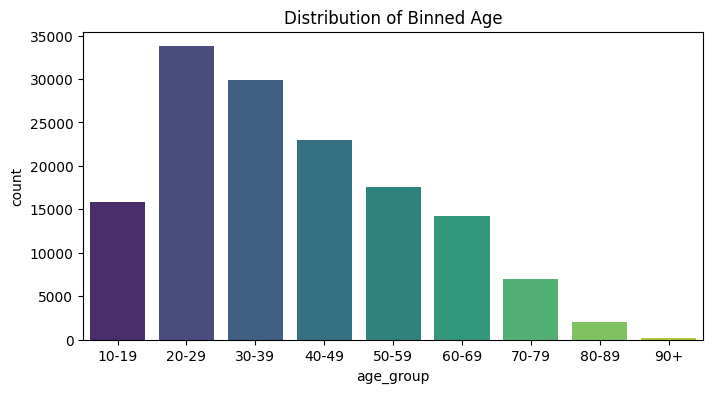

In [ ]:
# Visualization of the binned data
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age_group', palette="viridis")
plt.title('Distribution of Binned Age')
plt.show()

<Axes: ylabel='age'>

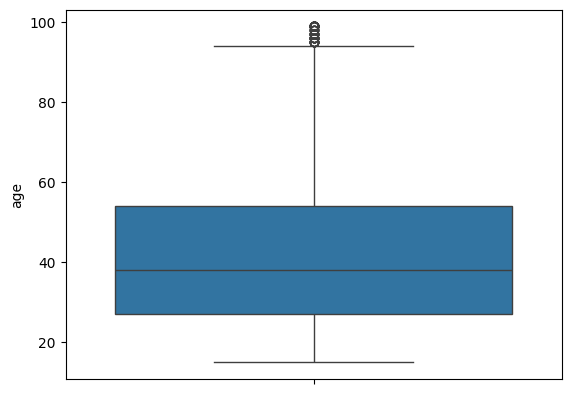

In [ ]:
sns.boxplot(data=df, y='age') #Boxplot of distribution of ages, outliers seen in values close to 100

In [ ]:
# Calculate Z-scores
z_scores = zscore(df['age'])

# Get boolean array indicating the presence of outliers
df['outlier_age'] = (z_scores > 3) | (z_scores < -3)

In [ ]:
# Drop the outliers based on the 'outlier' column
data_cleaned_age = df[~df['outlier_age']]


In [ ]:
data_cleaned_age['outlier_age'].sum() #

0

In [ ]:
# Removing categories Dont Know and Refused to answer from Education column
data_cleaned_education = df[~df['Education'].isin(['Dont Know', 'Refused to answer'])]



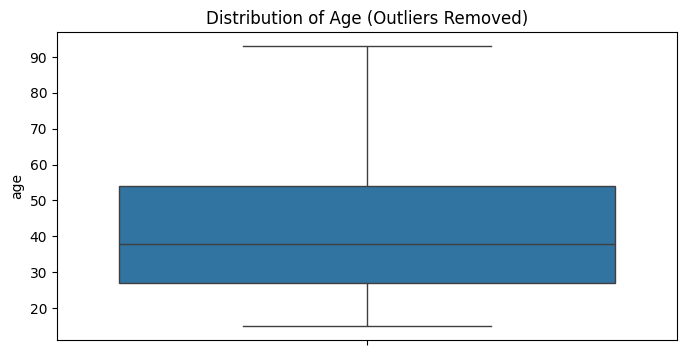

In [ ]:
# New boxplot with cleaned data
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_cleaned_age, y='age')
plt.title('Distribution of Age (Outliers Removed)')
plt.show()

In [ ]:
#Creating new variable of people 60 years old and older who have internet access
df['Internet_Access_Elderly'] = np.where((df['age'] >=60) & (df['Internet_Access'] == 'Yes'), 1, 0)



In [ ]:
df['Internet_Access_Elderly'] = df['Internet_Access_Elderly'].replace({0: 'No', 1: 'Yes'}) #Assigning categories for new variable
df.Internet_Access_Elderly.value_counts() #Displaying value counts of new variable

Internet_Access_Elderly
No     127086
Yes     16334
Name: count, dtype: int64

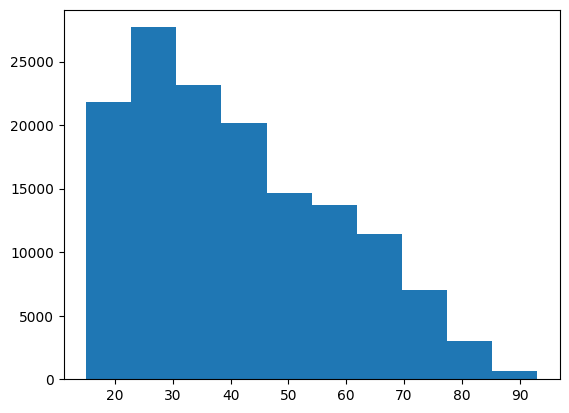

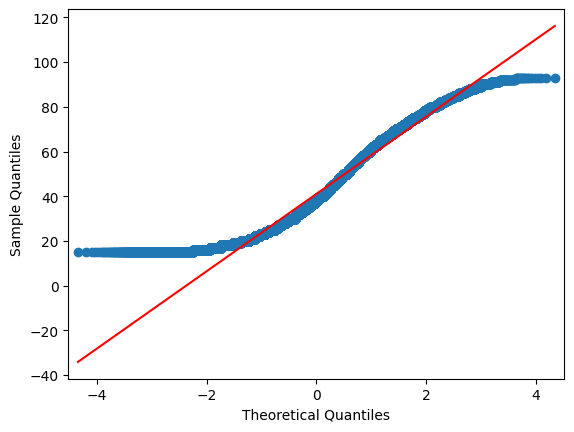

In [ ]:
# Checking whether data is normally distributed
plt.hist(data_cleaned_age['age'])
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(data_cleaned_age['age'], line='s')

plt.show() #Visual Exploration

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(data_cleaned_age['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
#H0: Data is normally distributed
#H1: Data is not normally distributed
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

#Hence we reject H0 and conclude data is not normally distributed

#It does not make sense to normalize age or gender due to them being categorical variables. Normalization could lead to incorrect interpretations.

Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 143347.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Summarize data using groupby

# Calculate the proportion of women in each education category
proportion_women_education_category = data_cleaned_education[data_cleaned_education['Gender'] == 'Female'].groupby('Education').size() / data_cleaned_education.groupby('Education').size() # Changed data to df in the denominator
proportion_women_education_category

Education
Primary school or less        0.590306
Secondary school              0.515104
Tertiary education or more    0.501503
dtype: float64

In [ ]:
# Using groupby() to mimic crosstab() functionality
grouped = data_cleaned_education.groupby(['Gender', 'Education'])['Education'].agg('count').unstack(fill_value=0)

# Adding row totals
grouped['Totals'] = grouped.sum(axis=1)

# Adding column totals
grouped.loc['Totals'] = grouped.sum(axis=0)
#Below table shows sums of Females and Males in each Education Category
grouped

Education  Primary school or less  Secondary school  \
Gender                                                
Female                      22751             37190   
Male                        15790             35009   
Totals                      38541             72199   

Education  Tertiary education or more  Totals  
Gender                                         
Female                          16020   75961  
Male                            15924   66723  
Totals                          31944  142684

In [ ]:
# Creating table using group by illustrating probability of Females and Males in each Education Category

tab_prob = pd.crosstab(df.Gender, data_cleaned_education.Education, margins=True, # Adding margins (Subtotals on the ends)
            margins_name="Totals")
tab_prob
# Using groupby() to mimic crosstab() functionality
grouped = data_cleaned_education.groupby(['Gender', 'Education'])['Education'].agg('count').unstack(fill_value=0)

# Adding row totals
grouped['Totals'] = grouped.sum(axis=1)

# Adding column totals
grouped.loc['Totals'] = grouped.sum(axis=0) #.loc used to select rows by their labels

# Calculate probability
grouped = grouped.div(grouped.loc['Totals', 'Totals'], axis=0)
#Table below shows probability of Females and Males in each Education Category
grouped


Education  Primary school or less  Secondary school  \
Gender                                                
Female                   0.159450          0.260646   
Male                     0.110664          0.245360   
Totals                   0.270114          0.506006   

Education  Tertiary education or more    Totals  
Gender                                           
Female                       0.112276  0.532372  
Male                         0.111603  0.467628  
Totals                       0.223879  1.000000

In [ ]:
data_cleaned_age['age'].mean() # Mean of Age

41.02833683299964

Text(0.5, 1.0, 'Distribution of Sample Means (Age)')

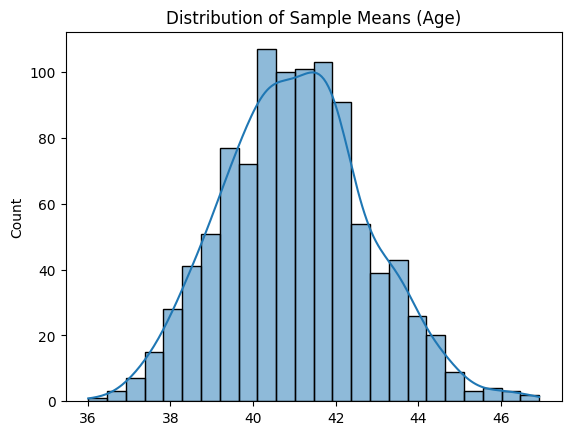

In [ ]:
sample_means = []


for _ in range(1000):
    sample = data_cleaned_age['age'].sample(100)
    sample_means.append(sample.mean()) # Calculation of Sample means of Age

sns.histplot(sample_means, kde=True).set_title('Distribution of Sample Means (Age)') #Creating Histogram of Sample Means of Age

Descriptive Statistics

-Calculate basic statistics for key variables (mean, median, variance, etc.).

-Explore data distributions with histograms, box plots, and density plots.

In [ ]:
# Median of Age
data_cleaned_age['age'].median()


38.0

In [ ]:
# Varience of Age
data_cleaned_age['age'].var()



299.3215220221308

In [ ]:
# Standard Deviation of Age
data_cleaned_age['age'].std()

17.300911017114988

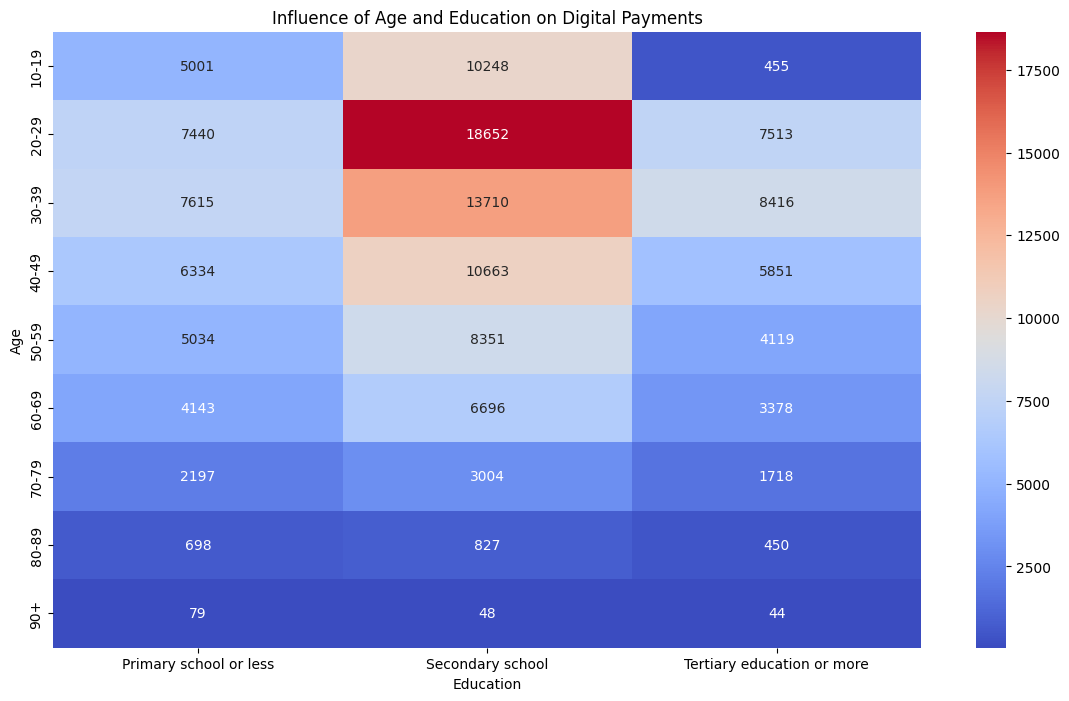

In [ ]:
# Create a pivot table for the heatmap
# Does age and Education influece digital payment?
outcome_density_plot_payment = data_cleaned_education.pivot_table(index='age_group', columns='Education', values='Digital_Payment', aggfunc='count', fill_value=0)
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_density_plot_payment, annot=True, fmt="d", cmap="coolwarm")

# Set titles and labels
plt.title('Influence of Age and Education on Digital Payments') # Added a title
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()

Exploratory Data Analysis (EDA) and Visualization

-Conduct thorough EDA of your chosen dataset.

-Create insightful visualizations—avoid trivial visuals like pie charts.

-Focus on revealing key insights.

In [ ]:
# Removing categories Dont Know and Refused to answer from Internet Access column
data_cleaned_internet = df[~df['Internet_Access'].isin(['Dont Know', 'Refused to answer'])]

# Removing categories Dont Know and Refused to answer from Internet Access and Education columns
data_cleaned_internet_education = df[~df['Internet_Access'].isin(['Dont Know', 'Refused to answer'])]
data_cleaned_internet_education = data_cleaned_internet_education[~data_cleaned_internet_education['Education'].isin(['Dont Know', 'Refused to answer'])]

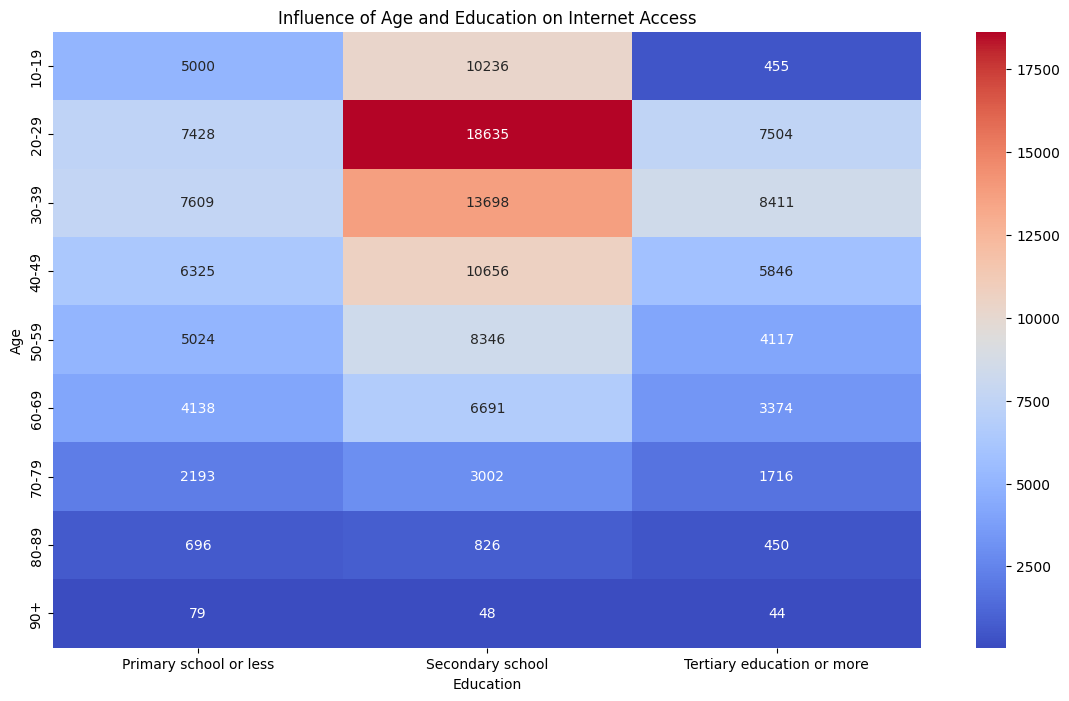

In [ ]:
# Create a pivot table for the heatmap
# Does age and Education influece digital payment?
outcome_density_plot_internet = data_cleaned_internet_education.pivot_table(index='age_group', columns='Education', values='Internet_Access', aggfunc='count', fill_value=0)
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_density_plot_internet, annot=True, fmt="d", cmap="coolwarm")

# Set titles and labels
plt.title('Influence of Age and Education on Internet Access') # Added a title
plt.xlabel('Education')
plt.ylabel('Age')
plt.show()

In [ ]:
import altair as alt

# Altair chart for Education, Gender, and Internet Access

# Filter the DataFrame for 'Tertiary Education Only' and exclude 'Dont know' from 'Internet_Access'

df_Internet = data_cleaned_internet_education[

    (data_cleaned_internet_education['Education'] == 'Tertiary education or more') &

    (data_cleaned_internet_education['Internet_Access'] != 'Dont know')

]

# Disable the row limit completely for Altair

alt.data_transformers.disable_max_rows()

# Display the filtered DataFrame (optional)

df_Internet

# Proceed with your Altair chart

chart = alt.Chart(df_Internet).mark_bar().encode(

    x=alt.X('Gender:N', title='Gender'),  # Change to Gender if you want to see Internet by Gender

    y=alt.Y('count()', title='Count'),

    color=alt.Color('Internet_Access:N', title='Internet Access'),

    tooltip=['Education', 'Gender', 'count()']

).properties(

    title='Internet Access by Gender for Tertiary Education Level',

    width=600,

    height=400

).interactive()

# Display the chart

chart




/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)